In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data = "C:/Users/CLINTON/Documents/My documents/LLM/Informatics/INFX 598/train.csv/train.csv"
df = pd.read_csv(data)
df.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36              50.5  ...   
3                46.0        1.8                36              50.5  ...   
4               100.0        2.4                36              50.5  ...   

   days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
0              14               0                0                0   
1              14               0                0                0   
2              14               0                0                0   
3              14               0                0                0   
4              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        NaN             1.0   
2                       1.0                        NaN             1.0   
3                       1.0                        NaN             1.0   
4                       1.0                        1.0             1.0   

   days_with_fog    site_eui  id  
0            NaN  248.682615   0  
1           12.0   26.500150   1  
2           12.0   24.693619   2  
3           12.0   48.406926   3  
4            NaN    3.899395   4  

[5 rows x 64 columns]

In [4]:
#Checking number of rows and columns
df.shape


(75757, 64)

In [5]:
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [7]:
#Checking for duplicate rows
dupRows = df.duplicated().sum()
print("there are " + str(dupRows) + " duplicated rows in the dataframe.")

there are 0 duplicated rows in the dataframe.


In [8]:
#Creating a funtion for Missing Values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table



In [9]:
missing_zero_values_table(df)

Your selected dataframe has 64 columns and 75757 Rows.
There are 6 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
days_with_fog                        0           45796               60.5   
direction_peak_wind_speed            0           41811               55.2   
direction_max_wind_speed             0           41082               54.2   
max_wind_speed                       0           41082               54.2   
energy_star_rating                   1           26709               35.3   
year_built                           6            1837                2.4   

                           Total Zero Missing Values  \
days_with_fog                                  45796   
direction_peak_wind_speed                      41811   
direction_max_wind_speed                       41082   
max_wind_speed                                 41082   
energy_star_rating                             26710   
year_built                                      1843   

                           % Total Zero Missing Values Data Type  
days_with_fog                                     60.5   float64  
direction_peak_wind_speed                         55.2   float64  
direction_max_wind_speed                          54.2   float64  
max_wind_speed                                    54.2   float64  
energy_star_rating                                35.3   float64  
year_built                                         2.4   float64

We can decide to drop columns with over 50% missing value but let's create a dataframe of them and the target variable and observe their correllation

In [10]:
Missing_columns = df[["days_with_fog", "direction_peak_wind_speed","direction_max_wind_speed","max_wind_speed","energy_star_rating",
                    "year_built", "site_eui"]]

In [11]:
Missing_columns.corr()

days_with_fog  direction_peak_wind_speed  \
days_with_fog                   1.000000                   0.330064   
direction_peak_wind_speed       0.330064                   1.000000   
direction_max_wind_speed        0.330441                   0.999784   
max_wind_speed                  0.353990                   0.992227   
energy_star_rating              0.019387                   0.002014   
year_built                      0.084167                  -0.009591   
site_eui                       -0.055388                   0.013589   

                           direction_max_wind_speed  max_wind_speed  \
days_with_fog                              0.330441        0.353990   
direction_peak_wind_speed                  0.999784        0.992227   
direction_max_wind_speed                   1.000000        0.988797   
max_wind_speed                             0.988797        1.000000   
energy_star_rating                        -0.000992       -0.000333   
year_built                                 0.001168        0.004945   
site_eui                                   0.010217        0.010639   

                           energy_star_rating  year_built  site_eui  
days_with_fog                        0.019387    0.084167 -0.055388  
direction_peak_wind_speed            0.002014   -0.009591  0.013589  
direction_max_wind_speed            -0.000992    0.001168  0.010217  
max_wind_speed                      -0.000333    0.004945  0.010639  
energy_star_rating                   1.000000   -0.073857 -0.511012  
year_built                          -0.073857    1.000000  0.017162  
site_eui                            -0.511012    0.017162  1.000000

from here, only energy_star_rating has a reasonable correllation with the site_eui, so we'll drop other columns and fill the energy_start_rating with the mean energy star rating

In [12]:
df.drop(['days_with_fog', 'direction_peak_wind_speed', 'direction_max_wind_speed', 'max_wind_speed', 'year_built','id'], axis = 1, inplace = True)

In [13]:
mean_star_rating = df["energy_star_rating"].mean()
df['energy_star_rating'].replace(np.nan, mean_star_rating, inplace=True)

In [14]:
#confirming there is no missing data
missing_zero_values_table(df)

Your selected dataframe has 58 columns and 75757 Rows.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Zero Values, Missing Values, % of Total Values, Total Zero Missing Values, % Total Zero Missing Values, Data Type]
Index: []

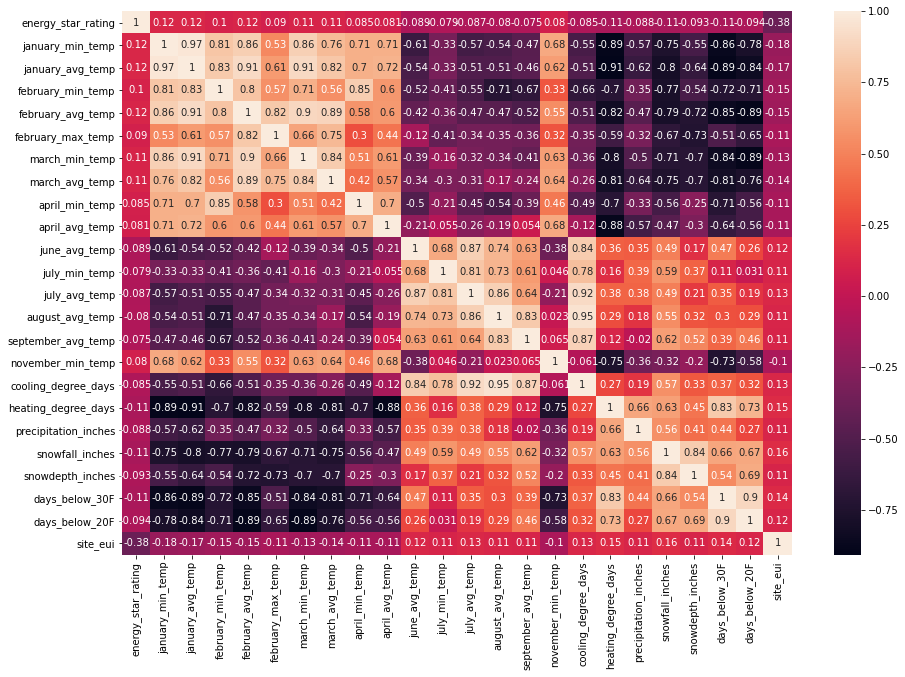

In [15]:
#Checking correlated numerical data
fig, ax = plt.subplots(figsize=(15,10)) 
Correlation_Matrix = df.corr()
Correlated_Features = Correlation_Matrix.index[abs(Correlation_Matrix["site_eui"])>0.1]
sns.heatmap(df[Correlated_Features].corr(),annot=True)

In the above codes, I limited the Correlated_Features to Features with more than abs(0.1) correlation

NB: Correlations is just for numerical variables

In [16]:
Correlated_Features

Index(['energy_star_rating', 'january_min_temp', 'january_avg_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'april_min_temp', 'april_avg_temp',
       'june_avg_temp', 'july_min_temp', 'july_avg_temp', 'august_avg_temp',
       'september_avg_temp', 'november_min_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'days_below_30F', 'days_below_20F', 'site_eui'],
      dtype='object')

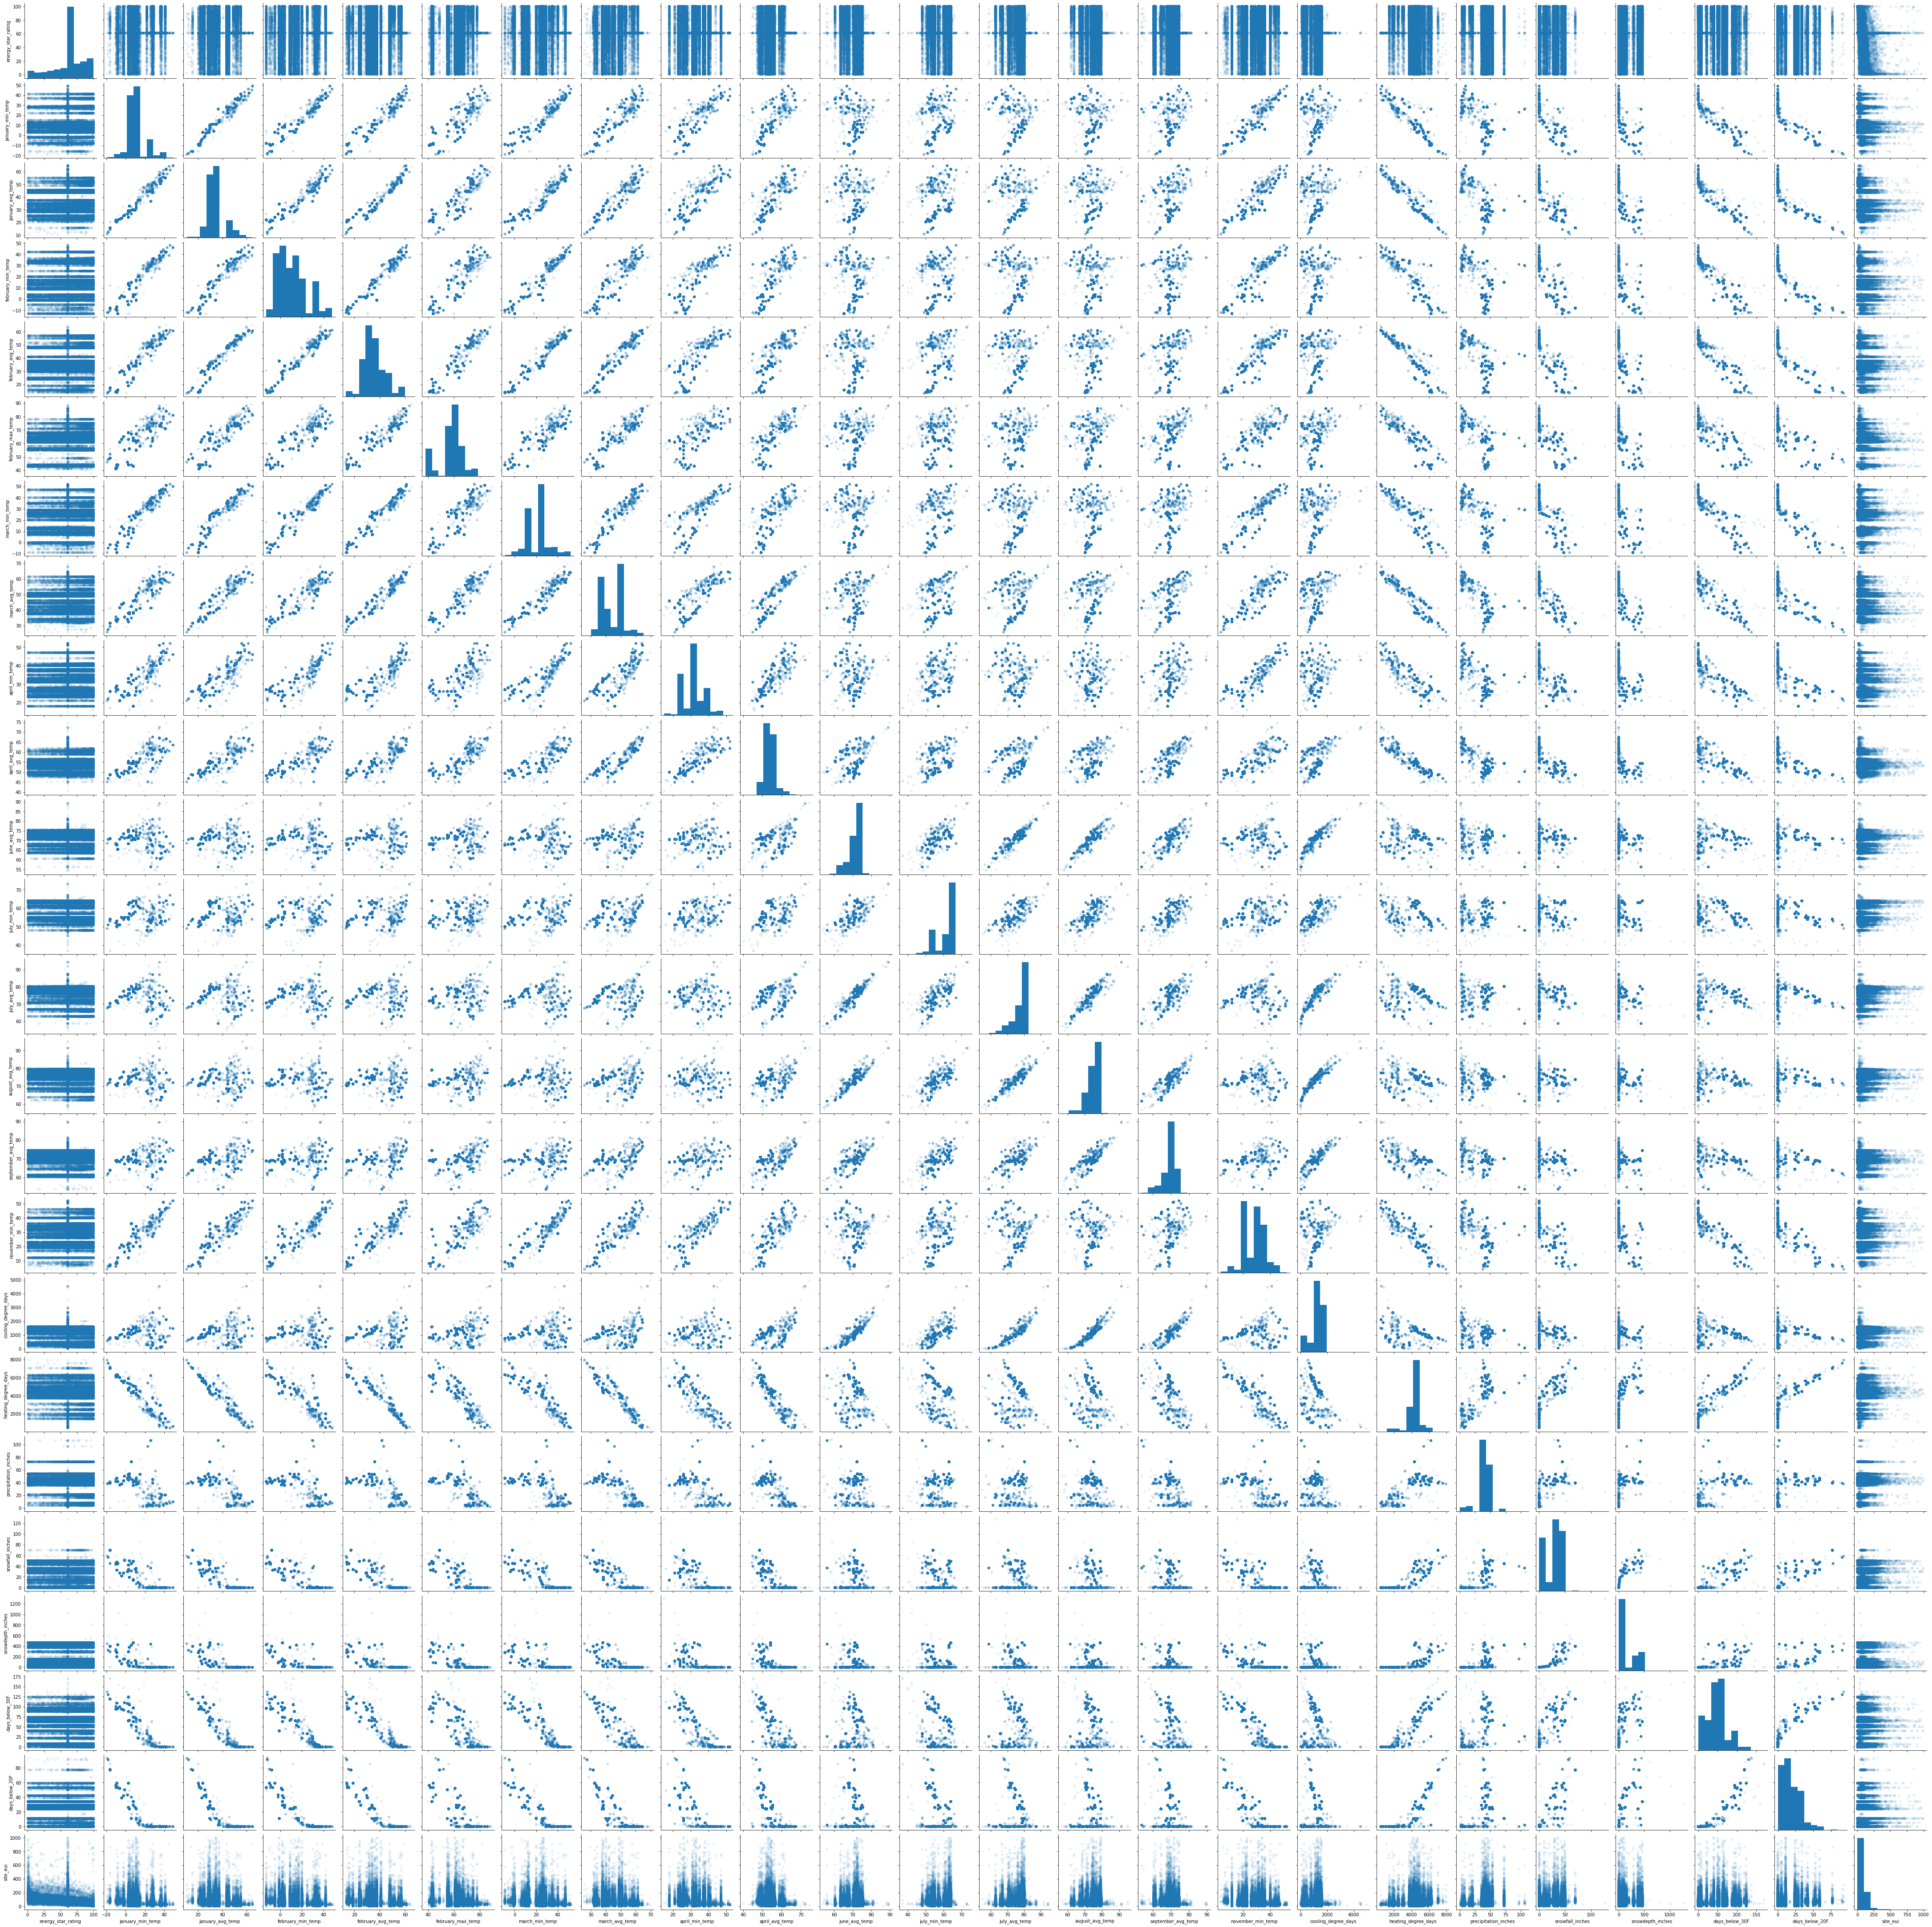

In [37]:
#Pairplot for Most correlated_features
sns.pairplot(df[Correlated_Features], plot_kws=dict(alpha=.1, edgecolor='none'))

The diagonals shows that most numerical features are skewed and would require normalization. Also Zooming in, we'll see that the precipitation_inches and february_max_temp have outliers. We explore and remove the outliers 

### Exploring Categorical Variable

In [17]:
#Checking Categories in State_Factor
df['State_Factor'].value_counts()

State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: State_Factor, dtype: int64

In [18]:
df['building_class'].value_counts()

Residential    43558
Commercial     32199
Name: building_class, dtype: int64

In [25]:
State_Factor_EUI = df.groupby(['State_Factor'])['site_eui'].mean().reset_index().sort_values(by="site_eui",ascending=False)
State_Factor_EUI

State_Factor   site_eui
4      State_4  95.199291
5      State_6  87.481012
6      State_8  87.416018
3      State_2  77.873978
1     State_10  68.597082
0      State_1  62.196194
2     State_11  53.989234

Text(0.5, 1.0, 'Site_EUI by State Factor')

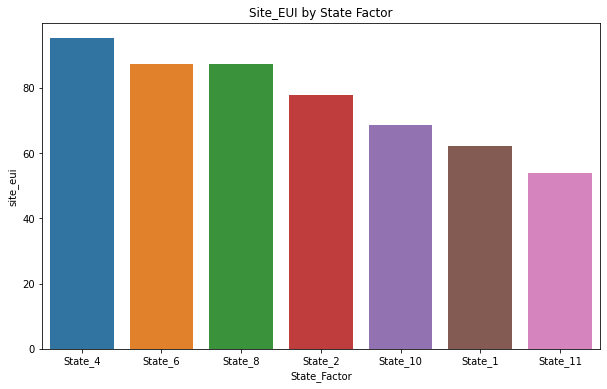

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x = State_Factor_EUI['State_Factor'], y = State_Factor_EUI['site_eui'])

plt.xlabel('State_Factor')
plt.ylabel("site_eui")
plt.title("Site_EUI by State Factor")

In [31]:
Building_class_EUI = df.groupby(['building_class'])['site_eui'].mean().reset_index().sort_values(by="site_eui",ascending=False)
Building_class_EUI

building_class   site_eui
0     Commercial  85.755239
1    Residential  80.240957

Text(0.5, 1.0, 'Building Class by State Factor')

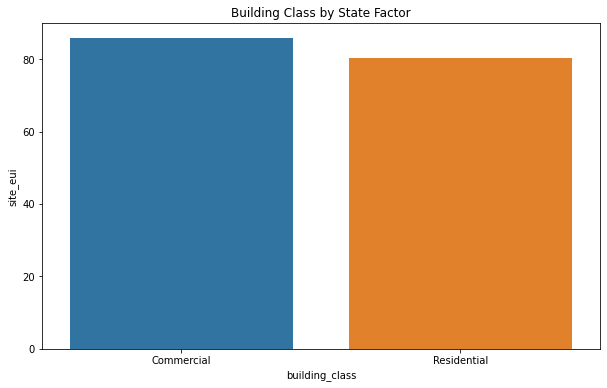

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x = Building_class_EUI['building_class'], y = Building_class_EUI['site_eui'])

plt.xlabel('building_class')
plt.ylabel("site_eui")
plt.title("Building Class by State Factor")

In [22]:
df['facility_type'].value_counts(normalize = True, ascending=False)

Multifamily_Uncategorized                    0.520810
Office_Uncategorized                         0.165160
Education_Other_classroom                    0.050952
Lodging_Hotel                                0.027694
2to4_Unit_Building                           0.024988
Commercial_Other                             0.023021
5plus_Unit_Building                          0.016804
Warehouse_Nonrefrigerated                    0.016566
Retail_Uncategorized                         0.014916
Education_College_or_university              0.013939
Nursing_Home                                 0.010190
Education_Uncategorized                      0.009359
Mixed_Use_Commercial_and_Residential         0.008870
Lodging_Dormitory_or_fraternity_sorority     0.008831
Warehouse_Distribution_or_Shipping_center    0.007973
Warehouse_Selfstorage                        0.007616
Grocery_store_or_food_market                 0.005914
Office_Medical_non_diagnostic                0.005900
Health_Care_Inpatient       

In [33]:
facility_type_EUI = df.groupby(['facility_type'])['site_eui'].mean().reset_index().sort_values(by="site_eui",ascending=False)
facility_type_EUI

facility_type    site_eui
4                                 Data_Center  339.734876
19                                 Laboratory  329.448470
14                      Health_Care_Inpatient  248.340597
13               Grocery_store_or_food_market  241.135162
11       Food_Service_Restaurant_or_cafeteria  195.593925
16       Health_Care_Outpatient_Uncategorized  189.892345
17                  Health_Care_Uncategorized  183.945201
45                 Public_Safety_Penitentiary  170.904892
41                    Public_Assembly_Stadium  157.041663
54        Service_Vehicle_service_repair_shop  137.595749
9                                  Food_Sales  136.793222
28                               Nursing_Home  131.313887
44       Public_Safety_Fire_or_police_station  131.122766
12                 Food_Service_Uncategorized  128.801496
38                      Public_Assembly_Other  126.704295
18                                 Industrial  125.345295
22                              Lodging_Other  120.958325
35      Public_Assembly_Entertainment_culture  118.900412
30              Office_Medical_non_diagnostic  116.762294
39                 Public_Assembly_Recreation  115.177708
53                      Service_Uncategorized  113.565430
3                          Commercial_Unknown  113.151628
49                 Retail_Strip_shopping_mall  110.418481
5             Education_College_or_university  108.629116
36                    Public_Assembly_Library  105.849109
21                              Lodging_Hotel  104.934997
15              Health_Care_Outpatient_Clinic  103.613131
43                   Public_Safety_Courthouse  103.182163
37              Public_Assembly_Movie_Theater  103.095275
48                       Retail_Enclosed_mall  100.965937
57                     Warehouse_Refrigerated   96.525301
2                            Commercial_Other   92.642037
29             Office_Bank_or_other_financial   89.895736
24       Mixed_Use_Commercial_and_Residential   89.529798
27                  Multifamily_Uncategorized   83.878522
46                Public_Safety_Uncategorized   83.709161
31                           Office_Mixed_use   82.110316
26        Mixed_Use_Predominantly_Residential   81.797872
20   Lodging_Dormitory_or_fraternity_sorority   81.595825
34              Public_Assembly_Drama_theater   80.916723
50                       Retail_Uncategorized   80.902854
40             Public_Assembly_Social_meeting   78.921954
32                       Office_Uncategorized   77.074389
6                   Education_Other_classroom   69.441531
25         Mixed_Use_Predominantly_Commercial   69.133400
33                             Parking_Garage   67.351241
23                      Lodging_Uncategorized   66.595438
42              Public_Assembly_Uncategorized   62.872612
7              Education_Preschool_or_daycare   60.974215
51         Retail_Vehicle_dealership_showroom   46.640952
8                     Education_Uncategorized   46.172799
47                          Religious_worship   44.560675
52             Service_Drycleaning_or_Laundry   42.112542
55  Warehouse_Distribution_or_Shipping_center   39.559542
56                  Warehouse_Nonrefrigerated   38.209399
1                         5plus_Unit_Building   36.737785
59                    Warehouse_Uncategorized   35.936435
0                          2to4_Unit_Building   31.876915
10                         Food_Service_Other   29.236616
58                      Warehouse_Selfstorage   21.589284

Text(0.5, 1.0, 'facility_type by State Factor')

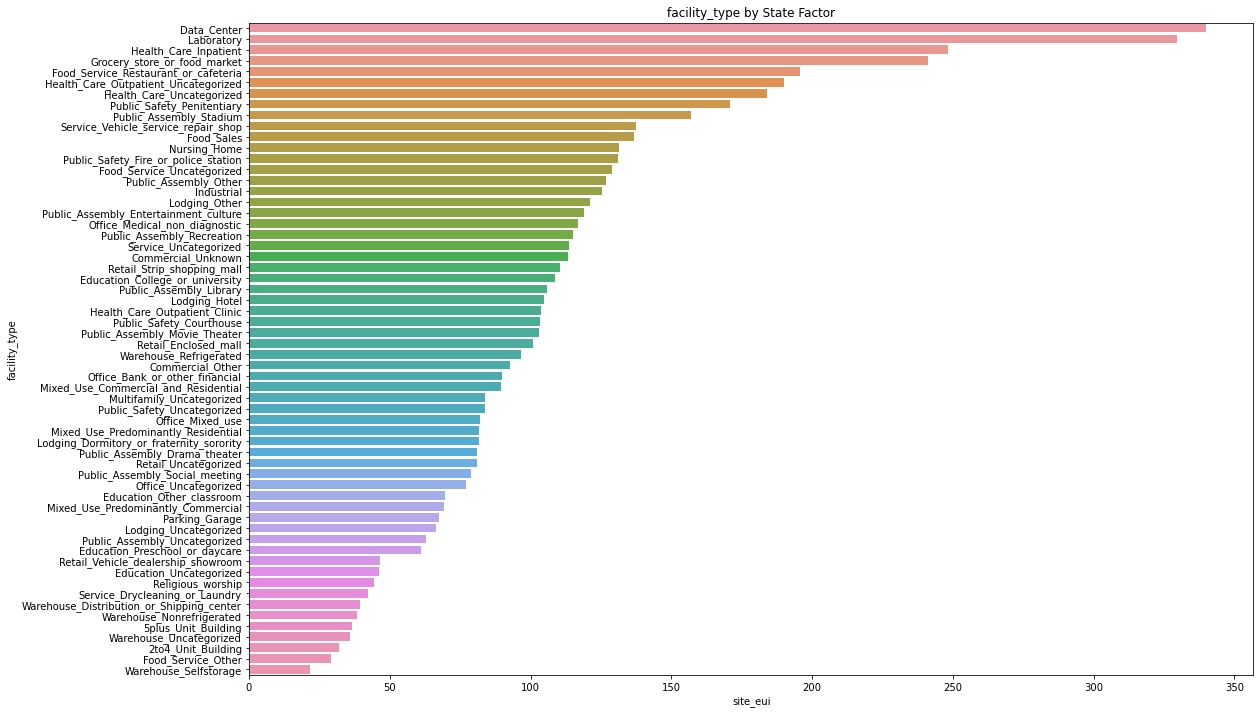

In [36]:
plt.figure(figsize=(18,12))
sns.barplot(x = facility_type_EUI['site_eui'], y = facility_type_EUI['facility_type'])

plt.xlabel('site_eui')
plt.ylabel("facility_type")
plt.title("facility_type by State Factor")

In [ ]:
house_price_gar = train_data.groupby(['GarageType'])['SalePrice'].mean().reset_index().sort_values(by="SalePrice",ascending=False)
house_price_gar 